<a href="https://colab.research.google.com/github/Jerry0209/FundamentalLearningEPFL/blob/main/HW2/hw2_theory_v1_Tianrui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

# Part 1: Expected Prediction Risk (EPR)

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset.

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

### **Q1 Ans**

1.  **Start with the definition of EPR(suqared loss):**

    * As $\Pr(X, Y) = \Pr(Y|X)\Pr(X)$
    * Then $\text{EPR}[f]$ becomes
    $$\begin{align}
\text{EPR}[f] &= \mathbb{E}_{X,Y}[(Y - f(X))^2] \\
              &= \int \left[y - f(x)\right]^2 \Pr(dx,dy) \\ &= \int \left[y - f(x)\right]^2 \Pr(dy|dx)\Pr(dy) \\ &= \int \Bigg( \int \left[y - f(x)\right]^2 \Pr(dy|x) \Bigg) \Pr(dx) \\ &= \int \Bigg( \mathbb{E}_{Y|X}[(Y - f(x))^2 | X=x] \Bigg) \Pr(dx) \\
              &= \mathbb{E}_X\Big[ \mathbb{E}_{Y|X}[(Y - f(X))^2 \mid X] \Big]
\end{align}$$


2.  **Pointwise Minimization:** To minimize the overall EPR, we can find the function $f(x)$ that minimizes the inner expectation for any given point $x$. It's shown that the EPR is minimized by the conditional mean of Y given X ($\mathbb{E}_{Y|X}[(Y - f(x))^2 | X=x]$). 

Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.

### **Q2 Ans**
1. Start with the definition of EPR: For classification, the model is $\hat{c}(x)$ and the true class is $C$.
    
    $$
    \text{EPR}[\hat{c}] = \mathbb{E}_{X,C}[L(C, \hat{c}(X))]
    $$
    

2. Use the simplified version as Q1
    
    $$
    \text{EPR}[\hat{c}] = \mathbb{E}_X\left[\mathbb{E}_{C|X}[L(C, \hat{c}(X)) | X]\right]
    $$
    

3. Simplify the Inner Expectation: The inner expectation is over the discrete classes $c_k \in \{1, \ldots, K\}$. Based on the definition of discrete expected value variable（$\mathbb{E}[Z]=\sum_iz_ip_i$）, we can rewrite this expectation as a sum, weighted by the posterior probabilities $P(c_k| X=x)$.

    $$
    \mathbb{E}_{C|X}[L(C, \hat{c}(x)) | X=x] = \sum_{k=1}^K L(c_k, \hat{c}(x)) P(c_k | X=x)
    $$

4. Final Expression: The outer expectation $\mathbb{E}_X[\dots]$ is an integral over all possible values of $x$, weighted by the data's density function $p(x)$. Substituting the inner sum gives the final simplified expression:

    $$
    \text{EPR}[\hat{c}] = \mathbb{E}_{X}\sum_{k=1}^K L(c_k, \hat{c}(x)) P(c_k | X)
    $$


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


### **Q3 Ans**

1. To optimize conditional risk pointwise in x**.** We minimize the inner risk for each $x$.
    
    $$
    c^*(x) = \arg\min_{c_k\in\{1,\ldots,K\}} \sum_{k=1}^K L(C, \hat{c}(x))\,P(c_k\mid X=x)
    $$
    
2. Plug in the 0-1 loss:
    
    $$
    c^*(x) = \arg\min_{c_k} \sum_{k=1}^K \mathbb{I}(c_k\neq \hat{c}(x))\,P(c_k\mid X=x)
    $$
    
3. Simplify $c^*(x)$: Because the "correct" term ( $k$ where $c_k = \hat{c}(x)$ ) becomes zero, the sum simplifies to the total probability of all "incorrect" classes:
    
    $$
    \sum_{k: c_k \neq \hat{c}(x)} P(c_k \mid X=x) = P(c_k \neq \hat{c}(x) \mid X=x)
    $$
    
4. Relate to Maximization: since probabilities sum to 1, we can write:
    
    $$
    P(c_k \neq \hat{c}(x) \mid X=x) = 1 - P(c_k = \hat{c}(x) \mid X=x)
    $$
    
5. Then the minimized inner risk becomes

    $$
    c^*(x) = \arg\min_{c_k} [1 - P(c_k = \hat{c}(x) \mid X=x)]
    $$

1. Minimizing $1 - P(\dots)$ is equivalent to maximizing $P(\dots)$. Therefore, the optimal Bayes Classifier $c^*(x)$ is the class $c_k$ that maximizes the posterior probability. This reasonable solution is known as the Bayes classifier:
    
    $$
    c^*(x) = \text{argmax}_{c_k \in \{1, \ldots, K\}} P(c_k \mid X=x)
    $$

Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [19]:
import numpy as np
# from scipy.stats import multivariate_normal
# from sklearn import mixture
# np.random.seed(1)
# g = mixture.GaussianMixture(n_components=3)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

# Get one sample from GMM
def gaussianMixture(pis, means, covs, n_components):

    # Check wether the length of each components are correct
    len_pis = len(pis);
    len_means = len(means);
    len_covs = len(covs);

    if (n_components != len_pis):
        print("Unmatched Data Length: len_pis!")
        return 0

    if (n_components != len_means):
        print("Unmatched Data Length: len_means!")
        return 0

    if (n_components != len_covs):
        print("Unmatched Data Length: len_covs!")
        return 0

    # Pick one component from n_comonents

    index_k = np.arange(n_components) # starts from 0
    component_k = np.random.choice(index_k, p=pis)

    component_mean = means[component_k];
    component_cov = covs[component_k];

    # Get one sample [X, C]
    sample = np.random.multivariate_normal(component_mean, component_cov)

    # Return sample and its label
    return sample, component_k


# Get N samples from GMM
def generate_N_GMM_samples(pis, means, covs, n_components, n_samples):
    samples_array = np.zeros((n_samples, 2))
    labels_array = np.zeros(n_samples, dtype=int)

    # Get labels and samples
    for i in range(n_samples): 
        random_sample, random_label = gaussianMixture(pis, means, covs, n_components)
        samples_array[i] = random_sample
        labels_array[i] = random_label

    return samples_array, labels_array

    
# def generate_N_GMM_samples(pis, means, covs, n_components, n_samples):
#     samples_array = np.zeros((n_samples, 2))
    
#     for sample in range(0,n_samples): # starts from 0
#         random_sample = gaussianMixture(pis, means, covs, n_components)
#         n_samples[sample] = random_sample

#     return n_samples


# import numpy as np

# # 假设 K=3，并且你已经定义了这些参数
# # pis = [pi_1, pi_2, pi_3]  (一个列表或numpy数组, 和为1)
# # means = [mu_1, mu_2, mu_3] (一个列表，每个元素是均值向量)
# # covs = [Sigma_1, Sigma_2, Sigma_3] (一个列表，每个元素是协方差矩阵)

# def generate_sample(pis, means, covs):
    
#     # 1. 根据先验概率 pi 抽样一个类别 k
#     # 假设 K=3，类别索引是 0, 1, 2
#     K_indices = np.arange(len(pis)) 
#     chosen_k = np.random.choice(K_indices, p=pis)
    
#     # 2. 根据选中的 k，从对应的高斯分布中抽样 x
#     chosen_mean = means[chosen_k]
#     chosen_cov = covs[chosen_k]
    
#     x_sample = np.random.multivariate_normal(chosen_mean, chosen_cov)
    
#     # 函数可以返回样本 x，或者(x, k)
#     return x_sample, chosen_k

# # (要生成 N 个样本，你只需要循环调用这个函数 N 次)


### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$:

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


First 5 samples:
[[-0.94157301  1.76024169]
 [ 1.88206418 -0.59764595]
 [-1.61351061  0.50304512]
 [ 0.29787335  1.37344492]
 [-1.11058493 -0.1146406 ]]

First 5 labels:
[2 0 0 0 0]


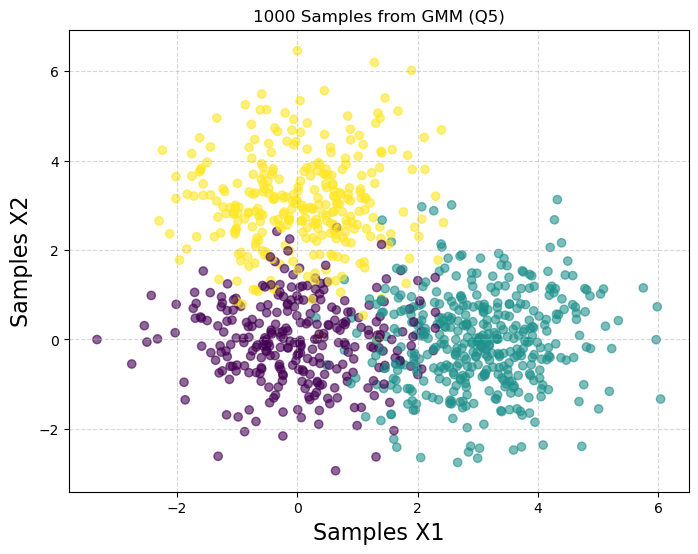

In [20]:
# Inputs of the model
K = 3

pis = np.array([0.3, 0.4, 0.3]);

means = np.array([
    [0, 0],
    [3, 0],
    [0, 3]
])


covs = np.array([
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]]
])

samples_data, labels_data = generate_N_GMM_samples(pis, means, covs, K, 1000)

print("First 5 samples:")
print(samples_data[:5])
print("\nFirst 5 labels:")
print(labels_data[:5])


# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(samples_data[:, 0], samples_data[:, 1], c=labels_data, alpha=0.6, cmap='viridis')
# Entire Row, for each entry [X, C], first element is X, the second element is C (category)

plt.title("1000 Samples from GMM (Q5)")
plt.xlabel('Samples X1', fontsize=16)
plt.ylabel('Samples X2', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model.

### **Q6** Compute the posterior probabilities for this model.

### **Q6 Ans**
Using Bayes' theorem, the posterior probability will be:

$$
P(c_k | x) = \frac{p(x|c_k) P(c_k)}{p(x)}
$$

By substituting the specific components of the Gaussian Mixture Model :

* $P(c_k) = \pi_k$ (The prior probability, or weight, of component $k$)
* $p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$ (The likelihood of $x$ under component $k$'s Gaussian)

* $p(x)$ is the total probability (evidence) of $x$, found by summing the joint probabilities over all $K$ components: $p(x) = \sum_{j=1}^K p(x, c_j) = \sum_{j=1}^K p(x|c_j) P(c_j)$

Final formula will be:
$$
P(c_k | x) = \frac{\pi_k \mathcal{N}(x|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x|\mu_j, \Sigma_j)}
$$

### Prediction Function Implementation
The `predict_class_GMM` function below is a direct implementation of the optimal Bayes Classifier(derived in Q3). The goal of this function is not to find the boundary itself, but to determine the "winning" class for any single point $x$. The Bayes classifier rule states that the optimal choice is the class $k$ that has the highest posterior probability, $P(c_k | X=x)$. The function uses an `argmax` operation to find exactly this.

To make this calculation efficient, the function uses a common optimization. The full posterior probability is calculated as $P(c_k | x) = \frac{p(x|c_k) P(c_k)}{p(x)}$. When comparing the posteriors for different classes (e.g., $k=1, 2, 3$) for the *same* point $x$, the denominator $p(x)$ is identical for all of them.

Because this $p(x)$ term is a constant divisor, it does not change which class $k$ will have the highest probability. Therefore, to find the $\text{argmax}_{c_k} P(c_k | X = x)$, we only need to find the $\text{argmax}_{c_k} [P(x | c_k) P(c_k)]$. The function does exactly this: it calculates this numerator score for each class and returns the index $k$ that has the highest score, which is computationally faster and gives the identical result.


In [21]:
from scipy.stats import multivariate_normal
# p(c_k) is given

# p(x|c_k)
def likelihood_GMM(pis, means, covs, component_k, sample_x):
    pdf_k = multivariate_normal(mean=means[component_k], cov=covs[component_k])
    likelihood = pdf_k.pdf(sample_x)
    return likelihood

# p(x)
def evidence_GMM(pis, means, covs, n_components, sample_x):
    evidence = 0;
    for k in range(0, n_components):
        evidence += pis[k] * likelihood_GMM(pis, means, covs, k, sample_x)
        
    return evidence

# Posterior p(c_k|x)
def posterior_GMM(pis, means, covs, n_components, component_k, sample_x):
    ev = evidence_GMM(pis, means, covs, n_components, sample_x)

    # Defense Programming: in case evidence = 0 (impossible to be divided by 0)
    if ev == 0:
        return 0.0
    
    numerator = pis[component_k] * likelihood_GMM(pis, means, covs, component_k, sample_x)
    return numerator / ev 

# Predict classes
def predict_class_GMM(pis, means, covs, n_components, sample_x):
    # p(x) is constant for the same x, to improve efficiency, I try only calculating the score: prior * likelihood
    # This implements argmax_k P(C=k | x)
    scores = np.zeros(n_components)
    for k in range(n_components):
        # score_k = p(C=k) * p(x | C=k)
        scores[k] = pis[k] * likelihood_GMM(pis, means, covs, k, sample_x)
        
    # Return the *index* (0, 1, or 2) of the class with the highest score
    return np.argmax(scores)

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

### **Q7A Ans**

1.  **Definition:** The decision boundary is the set of points $x$ where the posterior probabilities for class 1 ($c_1$) and class 2 ($c_2$) are equal.
    $$P(c_1 | x) = P(c_2 | x)$$

2.  **Simplify using Bayes' Theorem:** This equality holds if and only if the numerators of the posterior probabilities are equal (since the evidence $p(x)$ is a common denominator).
    $$p(x | c_1) P(c_1) = p(x | c_2) P(c_2)$$

3.  **Substituting the likelihood and prior probability:** We plug in the GMM definitions $P(c_k) = \pi_k$ and $p(x | c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$.
    $$\pi_1 \mathcal{N}(x|\mu_1, \Sigma_1) = \pi_2 \mathcal{N}(x|\mu_2, \Sigma_2)$$

4.  **Take Logarithm:** To linearize the equation, we take the natural log of both sides:
    $$\log(\pi_1) + \log(\mathcal{N}(x|\mu_1, \Sigma_1)) = \log(\pi_2) + \log(\mathcal{N}(x|\mu_2, \Sigma_2))$$

5.  **Expand Log-Likelihood of Gaussian:** The log-likelihood of a Gaussian is:
    $$\log \mathcal{N}(x|, \Sigma) = -\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) - \frac{1}{2}\log(|\Sigma|) - \text{const}$$

6.  **Apply Simplification by using conditions in Q5:** For the Q5 model, the covariances are equal: $\Sigma_1 = \Sigma_2 = I$ (identity matrix).
    * The $\log(|\Sigma_k|)$ terms cancel.
    * The quadratic terms $(x^T \Sigma_k^{-1} x)$ become $x^T x$ on both sides and also cancel, leaving a linear equation in $x$.

7.  **Simpliy Linear Equation:** After cancellations, the equation becomes:
    $$\log(\pi_1) + \mu_1^T x - \frac{1}{2}\mu_1^T \mu_1 = \log(\pi_2) + \mu_2^T x - \frac{1}{2}\mu_2^T \mu_2$$
    Rearranging gives the general linear form:
    $$(\mu_2 - \mu_1)^T x + \left( \log(\pi_1) - \log(\pi_2) + \frac{1}{2}\mu_1^T \mu_1 - \frac{1}{2}\mu_2^T \mu_2 \right) = 0$$

8.  **Substitute Real Values:** We plug in the specific values from Q5:
    * $x = [x_1, x_2]^T$
    * $\pi_1 = 0.3$, $\pi_2 = 0.4$
    * $\mu_1 = [0, 0]^T$, $\mu_2 = [3, 0]^T$

9.  **Calculate Each Term:**
    * $(\mu_2 - \mu_1)^T x = [3, 0] [x_1, x_2]^T = 3x_1$
    * $\log(\pi_1) - \log(\pi_2) = \log(0.3/0.4) = \log(0.75)$
    * $\frac{1}{2}\mu_1^T \mu_1 = 0$
    * $\frac{1}{2}\mu_2^T \mu_2 = \frac{1}{2}(3^2 + 0^2) = 4.5$

10. **Final Analytical Expression and Solution:**
    $$3x_1 + \log(0.75) + 0 - 4.5 = 0$$
    This simplifies to $3x_1 - 4.5 + \log(0.75) = 0$.

    Then,
    $$x_1 = \frac{4.5 - \log(0.75)}{3} \approx 1.595984$$
    This is the equation for a vertical line, which is the decision boundary between $c_1$ and $c_2$.


In [22]:
# Plots the GMM decision regions (contour) and data (scatter)
def plot_decision_boundary_base(pis, means, covs, n_components, samples_data, labels_data):

    # Define grid boundaries from data
    x_min, x_max = samples_data[:, 0].min() - 1, samples_data[:, 0].max() + 1
    y_min, y_max = samples_data[:, 1].min() - 1, samples_data[:, 1].max() + 1
    
    # Create the meshgrid
    h = 0.05 # Step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each grid point
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    print("Predicting on grid points... (this may take a moment)")
    Z = np.array([predict_class_GMM(pis, means, covs, n_components, pt) for pt in grid_points])
    print("Prediction complete.")
    
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(samples_data[:, 0], samples_data[:, 1], c=labels_data, 
                cmap='viridis', edgecolors='k', s=25, alpha=0.7)
    
    plt.title("Optimal Decision Boundaries")
    plt.xlabel("X1")
    plt.ylabel("X2")
    
    # Return the y-axis limits
    return y_min, y_max
# def plot_decision_boundary(pis, means, covs, n_components, samples_data, labels_data):
#     """
#     Plots the GMM decision boundaries using a meshgrid.
#     """
    
#     # 1. Define the boundaries of the plot
#     x_min, x_max = samples_data[:, 0].min() - 1, samples_data[:, 0].max() + 1
#     y_min, y_max = samples_data[:, 1].min() - 1, samples_data[:, 1].max() + 1
    
#     # 2. Create the meshgrid
#     h = 0.05
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # 3. Predict the class for every point in the grid
#     grid_points = np.c_[xx.ravel(), yy.ravel()]
    
#     print("Predicting on grid points...")
#     Z = np.array([predict_class_GMM(pis, means, covs, n_components, pt) for pt in grid_points])
#     print("Prediction complete.")
    
#     # Reshape the results (Z) back to the grid shape
#     Z = Z.reshape(xx.shape)

#     # 4. Plot the contour (regions) and the data points
#     plt.figure(figsize=(10, 8))
    
#     # Plot the filled contour map
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
#     # Plot the original data points on top
#     plt.scatter(samples_data[:, 0], samples_data[:, 1], c=labels_data, 
#                 cmap='viridis', edgecolors='k', s=25, alpha=0.7)
    

#     plt.title("Optimal Decision Boundaries")
#     plt.xlabel("X1")
#     plt.ylabel("X2")
#     plt.legend()
#     plt.show()

### **Q7B** Plot the optimal decision boundary for this model using the above calcultations.


Predicting on grid points... (this may take a moment)
Prediction complete.


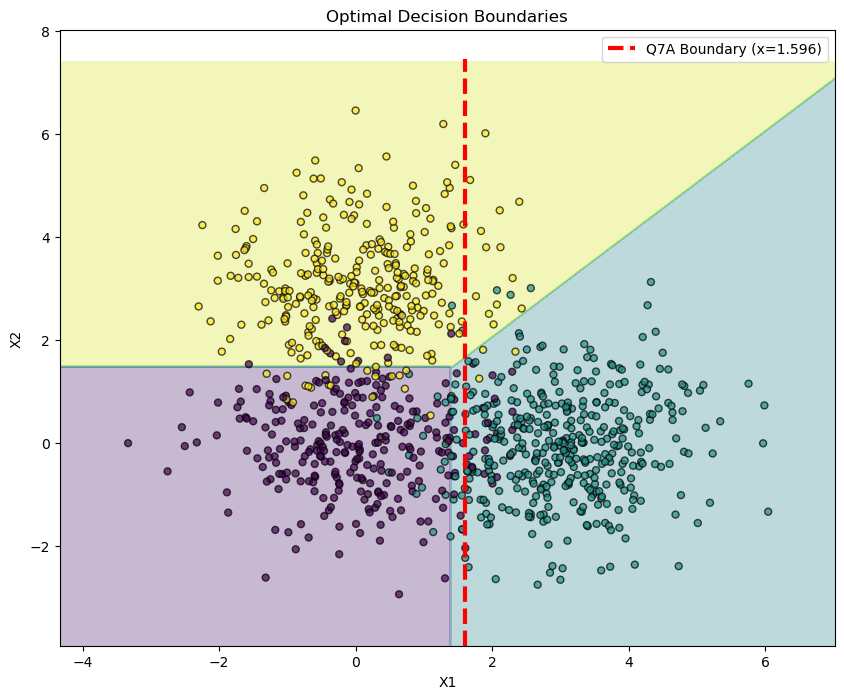

In [24]:
# Use plot_decision_boundary_base() function to plot
y_min_q5, y_max_q5 = plot_decision_boundary_base(
    pis, 
    means, 
    covs, 
    K, 
    samples_data, 
    labels_data
)

# Boundary in Q7A
x_boundary_1_2 = (4.5 - np.log(0.75)) / 3.0

# Show this boundary
plt.vlines(x=x_boundary_1_2, 
           ymin=y_min_q5, 
           ymax=y_max_q5, 
           colors='red', 
           linestyles='--', 
           linewidth=3, 
           label=f'Q7A Boundary (x={x_boundary_1_2:.3f})')

plt.legend()
plt.show()
# plot_decision_boundary_base(pis, means, covs, K, samples_data, labels_data)

### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


In [25]:
# Misclassification rate is the ratio of (number of misclassification) and total number of samples
def compute_error(pis, means, covs, n_components, samples_data, true_labels):   
    # Get the total number of samples
    n_samples = len(true_labels)
    
    predicted_labels = np.zeros(n_samples, dtype=int)
    
    print(f"Calculating predictions for {n_samples} samples...")
    
    # Loop over every sample in the dataset
    for i in range(n_samples):
        sample_x = samples_data[i]
        
        # Predict the class using the Bayes classifier function
        pred_label = predict_class_GMM(pis, means, covs, n_components, sample_x)
        predicted_labels[i] = pred_label
        
    # Compare and count errors
    # np.sum() counts True as 1 and False as 0.
    incorrect_predictions = np.sum(predicted_labels != true_labels)
    
    # Calculate the rate
    misclassification_rate = incorrect_predictions / n_samples
    
    return misclassification_rate, incorrect_predictions


# Call the error function on the Q5 data
misclassification_rate, misclassification_count = compute_error(
    pis, 
    means, 
    covs, 
    K, 
    samples_data, 
    labels_data
)

print("\n--- Q8 Results ---")
print(f"Dataset: Q5 Model (Identical Covariances)")
print(f"Total samples tested: {len(labels_data)}")
print(f"Incorrect predictions: {misclassification_count}")
print(f"Misclassification Rate: {misclassification_rate * 100:.2f}%")

Calculating predictions for 1000 samples...

--- Q8 Results ---
Dataset: Q5 Model (Identical Covariances)
Total samples tested: 1000
Incorrect predictions: 89
Misclassification Rate: 8.90%


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$:

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$

### **Q9** What is the decision boundary between class 1 and class 2 in this case?
Note: a fully analytical or functional solution might be difficult to obtain; only an interpretable and practical solution for plotting is required.


### **Q9 Ans**

1.  **Definition:** The decision boundary is the set of points $x$ where the posterior probabilities for class 1 ($c_1$) and class 2 ($c_2$) are equal.
    $$P(c_1 | x) = P(c_2 | x)$$

2.  **Simplify using Bayes' Theorem:** This equality holds if and only if the numerators of the posterior probabilities are equal.
    $$p(x | c_1) P(c_1) = p(x | c_2) P(c_2)$$

3.  **Substituting the likelihood and prior probability:** We plug in the GMM definitions $P(c_k) = \pi_k$ and $p(x | c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$.
    $$\pi_1 \mathcal{N}(x|\mu_1, \Sigma_1) = \pi_2 \mathcal{N}(x|\mu_2, \Sigma_2)$$

4.  **Take Logarithm:** We take the natural log of both sides:
    $$\log(\pi_1) + \log(\mathcal{N}(x|\mu_1, \Sigma_1)) = \log(\pi_2) + \log(\mathcal{N}(x|\mu_2, \Sigma_2))$$

5.  **Expand Log-Likelihood of Gaussian:** The full log-likelihood of a Gaussian is:
    $$\log \mathcal{N}(x|\mu, \Sigma) = -\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) - \frac{1}{2}\log(|\Sigma|) - \frac{d}{2}\log(2\pi)$$

6.  **Apply Simplification in Q9 (like Q7A):**
    * We substitute the full log-likelihood (from step 5) into the equation from step 4. The constant $\frac{d}{2}\log(2\pi)$ terms cancel.
    * In Q9, the covariances are unequal:
        $\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$ and $\Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right]$
    * Because $\Sigma_1 \neq \Sigma_2$, the determinant terms $\log(|\Sigma_k|)$ do not cancel.
    * Crucially, because $\Sigma_1^{-1} \neq \Sigma_2^{-1}$, the quadratic terms $x^T \Sigma_k^{-1} x$ do not cancel (unlike in Q7A).

7.  **Final Interpretable Expression:**
    The full equation for the decision boundary is:
    $$
    \log(\pi_1) - \frac{1}{2}\log(|\Sigma_1|) - \frac{1}{2}(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1) = \log(\pi_2) - \frac{1}{2}\log(|\Sigma_2|) - \frac{1}{2}(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2)
    $$
    It is a quadratic equation in $x$ (containing $x_1^2, x_2^2$ terms), and its solution is a curve (a conic section), not a line as Q7A.

In [26]:
# Inputs of the model (Q9)
K_q9 = 3

pis_q9 = np.array([0.3, 0.4, 0.3]);

means_q9 = np.array([
    [0, 0],
    [3, 0],
    [0, 3]
])


covs_q9 = np.array([
    [[1, 0], [0, 1]],
    [[2, 0], [0, 2]],
    [[1, 0.5], [0.5, 1]]
])

samples_data_q9, labels_data_q9 = generate_N_GMM_samples(pis_q9, means_q9, covs_q9, K_q9, 1000)

print("First 5 samples:")
print(samples_data_q9[:5])
print("\nFirst 5 labels:")
print(labels_data_q9[:5])

First 5 samples:
[[ 4.06147834 -0.68003127]
 [ 3.77985222 -0.37712652]
 [-0.71236875  0.74933549]
 [ 0.4403581   3.75866731]
 [-1.85288963  3.35432387]]

First 5 labels:
[1 1 0 2 2]


### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



### **Q10 Ans**

The most significant difference from the previous plot in Q7B is that the decision boundaries are no longer straight lines but are now clearly quadratic curves, or conic sections. This change is a direct theoretical consequence of the new model parameters. In the previous case (Q5), all components shared identical covariance matrices ($\Sigma_k = I$). As shown in the Q7A derivation, this led to a crucial cancellation of all quadratic terms (like $x^T \Sigma^{-1} x$) and determinant terms ($\log(|\Sigma_k|)$) in the boundary equation, resulting in a simple linear solution.

In this new model (Q9), the covariance matrices $\Sigma_k$ are unequal. Because of this, the quadratic terms and the determinant terms in the log-likelihood equation **do not** cancel. The final equation for the decision boundary remains a full quadratic equation, which naturally produces the curved boundaries seen in the plot. This means the Bayes classifier is now sensitive not only to the priors ($\pi_k$) and means ($\mu_k$) but also to the unique shape and scale of each component, as defined by $\Sigma_k$ and its determinant, $|\Sigma_k|$. This is visible, for example, where the boundary between $c_1$ ($\Sigma_1=I$) and $c_2$ ($\Sigma_2=2I$) curves around $c_1$, effectively "giving more space" to the more spread-out $c_2$ component. Likewise, the boundaries involving $c_3$ are tilted to align with the correlation in its covariance matrix (0.5 in the matrix).

Predicting on grid points... (this may take a moment)
Prediction complete.


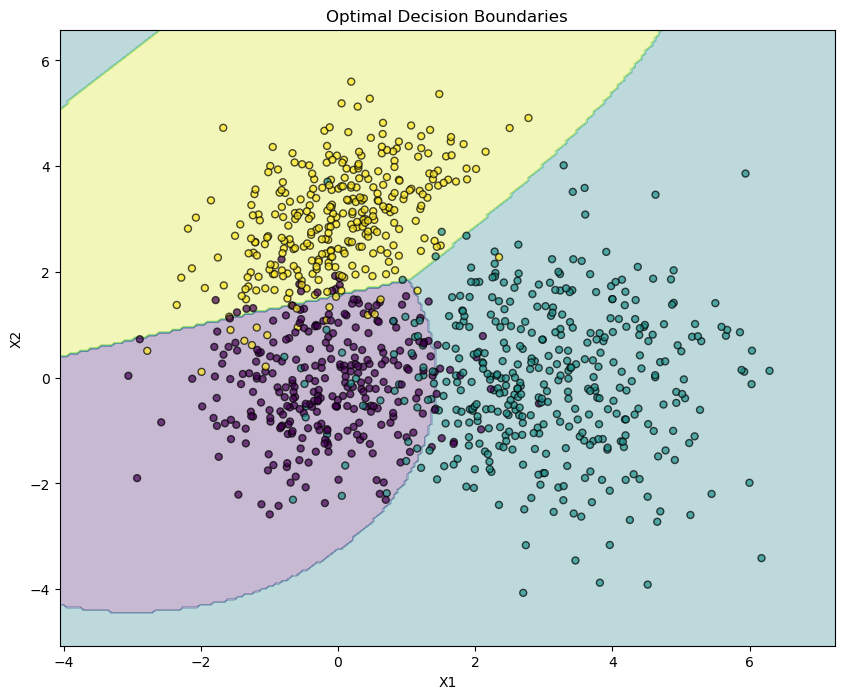

In [27]:
plot_decision_boundary_base(pis_q9, means_q9, covs_q9, K_q9, samples_data_q9, labels_data_q9)
plt.show()

### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them.

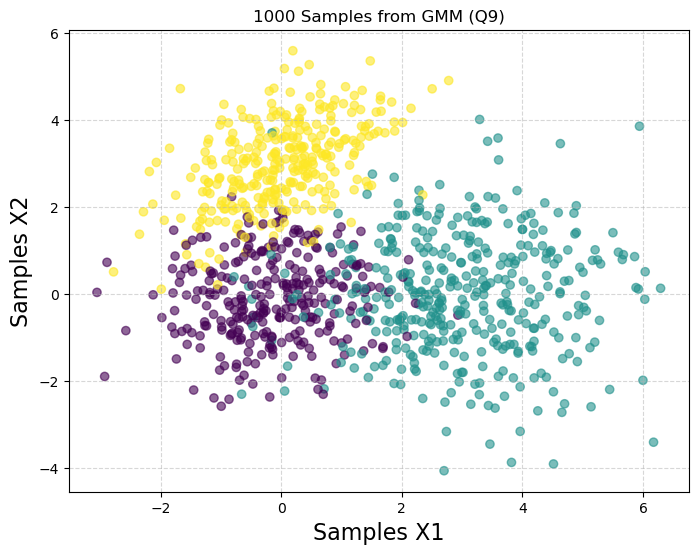

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(samples_data_q9[:, 0], samples_data_q9[:, 1], c=labels_data_q9, alpha=0.6, cmap='viridis')

plt.title("1000 Samples from GMM (Q9)")
plt.xlabel('Samples X1', fontsize=16)
plt.ylabel('Samples X2', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Q12** Compute the error of the Bayes classifier on this dataset.

In [30]:
# Call the error function on the Q9 data
misclassification_rate_q9, misclassification_count_q9 = compute_error(
    pis_q9, 
    means_q9, 
    covs_q9, 
    K, 
    samples_data_q9, 
    labels_data_q9
)

print("\n--- Q12 Results ---")
print(f"Dataset: Q9 Model (Different Covariances)")
print(f"Total samples tested: {len(labels_data_q9)}")
print(f"Incorrect predictions: {misclassification_count_q9}")
print(f"Misclassification Rate: {misclassification_rate_q9 * 100:.2f}%")


Calculating predictions for 1000 samples...

--- Q12 Results ---
Dataset: Q9 Model (Different Covariances)
Total samples tested: 1000
Incorrect predictions: 91
Misclassification Rate: 9.10%
